In [ ]:
 # Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install roboflow

from roboflow import Roboflow
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="zFQnSt2437Ig6aCAtSZ4", model_format="clip")
dataset = rf.workspace("yulia-pratiwi-45vut").project("derma").version(1).download(location="/content/Dermalysis")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/Dermalysis in clip:: 100%|██████████| 3495/3495 [00:00<00:00, 8203.95it/s]


In [ ]:
# from pathlib import Path
# image_dir = Path('/content/Dermalysis/train')
# test_data_path = "/content/Dermalysis/test"

# # Get filepaths and labels
# filepaths = list(image_dir.glob(r'**/*.jpg'))
# labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

from pathlib import Path
import os

# Directories
train_dir = Path('/content/Dermalysis/train')
test_dir = Path('/content/Dermalysis/test')

# Get filepaths and labels for training data
train_filepaths = list(train_dir.glob(r'**/*.jpg'))
train_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], train_filepaths))

# Get filepaths and labels for test data
test_filepaths = list(test_dir.glob(r'**/*.jpg'))
test_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], test_filepaths))

In [ ]:
# # Import pandas
# import pandas as pd

# # Pastikan train_df sudah terpisah dengan benar
# train_df = shuffle(train_df, random_state=1)

# # Hitung jumlah data per kelas di train_df
# class_counts_train = train_df['Label'].value_counts()
# print("Jumlah data per kelas (train_df):")
# print(class_counts_train)


In [ ]:
# # Directories
# test_dir = Path('/content/Dermalysis/test')

# # Get filepaths and labels for test data
# test_filepaths = list(test_dir.glob(r'**/*.jpg'))
# test_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], test_filepaths))

# # Buat DataFrame untuk test data
# test_df = pd.DataFrame({
#     'Filepath': test_filepaths,
#     'Label': test_labels
# })

# # Hitung jumlah data per kelas di test_df
# class_counts_test = test_df['Label'].value_counts()
# print("\nJumlah data per kelas (test_df):")
# print(class_counts_test)



Jumlah data per kelas (test_df):
Label
CacarAir     61
Kurap        58
KutuAir      54
Jerawat      53
JamurKuku    52
Name: count, dtype: int64


In [ ]:
# # Pastikan validasi_df sudah terpisah dengan benar
# validasi_df = shuffle(validasi_df, random_state=1)

# # Hitung jumlah data per kelas di validasi_df
# class_counts_validasi = validasi_df['Label'].value_counts()
# print("\nJumlah data per kelas (validasi_df):")
# print(class_counts_validasi)



Jumlah data per kelas (validasi_df):
Label
KutuAir      137
Jerawat      132
Kurap        127
CacarAir     125
JamurKuku    120
Name: count, dtype: int64


In [ ]:
# Convert lists to pandas Series
train_filepaths = pd.Series(train_filepaths, name='Filepath').astype(str)
train_labels = pd.Series(train_labels, name='Label')

test_filepaths = pd.Series(test_filepaths, name='Filepath').astype(str)
test_labels = pd.Series(test_labels, name='Label')

# Concatenate filepaths and labels into DataFrames
train_df = pd.concat([train_filepaths, train_labels], axis=1)
test_df = pd.concat([test_filepaths, test_labels], axis=1)

# Shuffle the DataFrames
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

# Show the first 3 rows of each DataFrame
print("Train Data:")
print(train_df.head(3))

# print("\nTest Data:")
# print(test_df.head(3))

Train Data:
                                            Filepath      Label
0  /content/Dermalysis/train/Kurap/90_FU-ringworm...      Kurap
1  /content/Dermalysis/train/JamurKuku/156_JPG_jp...  JamurKuku
2  /content/Dermalysis/train/Kurap/Ringworm-204-_...      Kurap


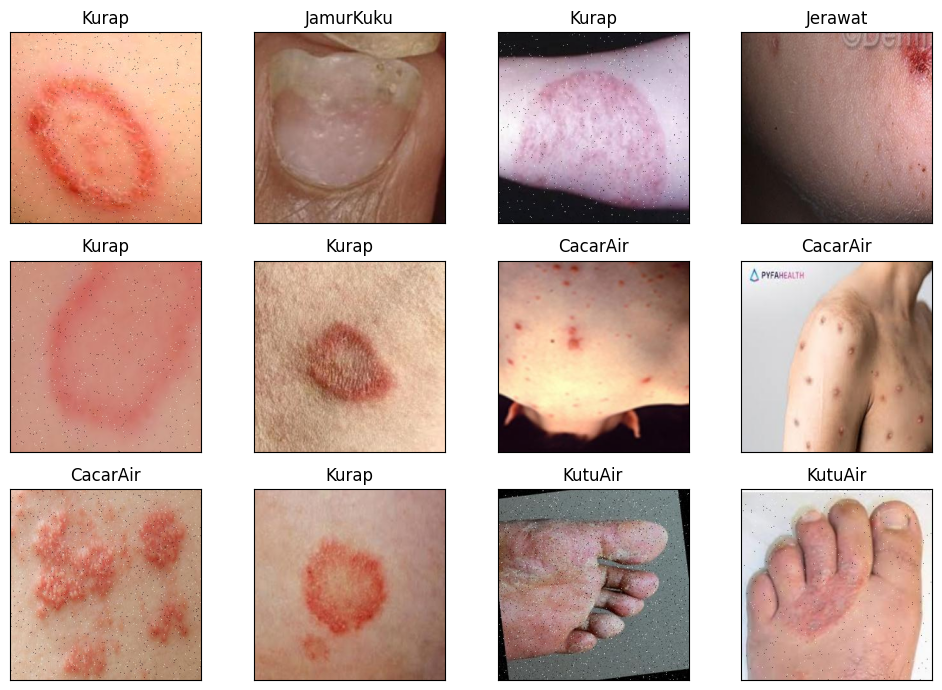

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Adjust this based on your actual DataFrame
image_df =  train_df

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                         subplot_kw={'xticks': [], 'yticks': []})

# Iterate through the first 12 images in the DataFrame
for i, ax in enumerate(axes.flat):
    filepath = image_df.Filepath[i]
    label = image_df.Label[i]

    # Load and display the image
    img = mpimg.imread(filepath)
    ax.imshow(img)
    ax.set_title(label)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



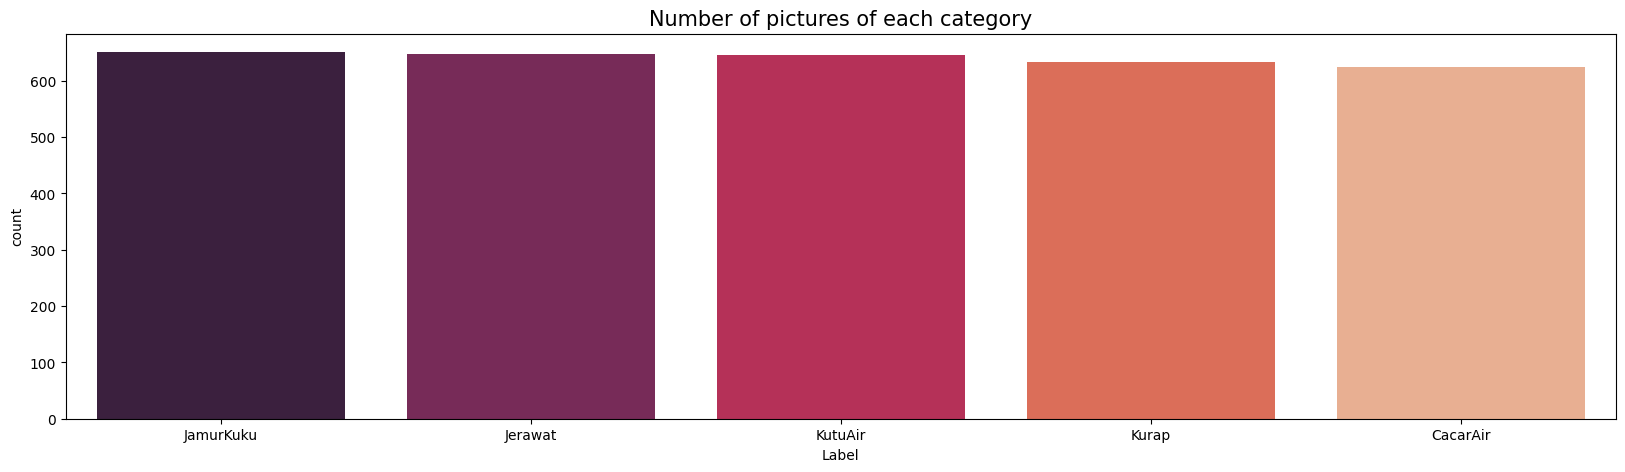

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
#Shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, validasi_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Inisialisasi ImageDataGenerator untuk data pelatihan dengan augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)

# Inisialisasi ImageDataGenerator untuk data validasi dan test tanpa augmentasi
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Membuat generator data pelatihan
train_data = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    seed=0,
    target_size=(416, 416),
    batch_size=16,
    shuffle=True,
    class_mode='categorical',
    subset='training')
# Membuat generator data validasi
validasi_data = val_datagen.flow_from_dataframe(
    dataframe=validasi_df,
    x_col='Filepath',
    y_col='Label',
    seed=0,
    target_size=(416, 416),
    batch_size=16,
    shuffle=False,
    class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    seed=0,
    target_size=(416, 416),
    batch_size=16,
    shuffle=False,
    class_mode='categorical')

Found 2560 validated image filenames belonging to 5 classes.
Found 641 validated image filenames belonging to 5 classes.
Found 278 validated image filenames belonging to 5 classes.


In [ ]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-07-18 13:34:18--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.207, 74.125.141.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   214MB/s    in 0.4s    

2024-07-18 13:34:19 (214 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from keras import Model, Input
input_shape = (416,416,3)
model_input = Input(shape=input_shape)

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, ModelCheckpoint

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (416, 416, 3),
                                include_top = False,
                                input_tensor=model_input,
                                weights = "imagenet")

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = True

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 207, 207, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 207, 207, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 207, 207, 32)         0         ['batch_normalizati

In [ ]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 11, 11, 2048)


In [ ]:
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (5, activation='softmax')(x)

# Append the dense network to the base model
inception = Model(pre_trained_model.input, x)

# Print the model summary. See your dense network connected at the end.
inception.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 207, 207, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 207, 207, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 207, 207, 32)         0         ['batch_normalization_94

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.05 and logs.get('val_accuracy') > 0.90:
            print("\nStop, Akurasi mencapai 98%")
            self.model.stop_training = True

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metrik yang ingin dipantau
    patience=5,          # Jumlah epoch tanpa peningkatan yang signifikan sebelum pelatihan dihentikan
    verbose=1,           # Menampilkan pesan ketika pelatihan dihentikan
    restore_best_weights=True # Mengembalikan bobot terbaik saat pelatihan dihentikan
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/ens2_inception/inception.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [ ]:
from tensorflow.keras.optimizers import Adam
# Set the training parameters
callbacks = [myCallback(), early_stopping]
inception.compile(optimizer = Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history_inception = inception.fit(
                  train_data,
                  validation_data=validasi_data,
                  steps_per_epoch=train_data.n/32,
                  validation_steps=validasi_data.n/32,
                  epochs=25,
                  callbacks=[callbacks, checkpoint_callback])


Epoch 1/25
80/80 [==============================] - ETA: 0s - loss: 3.2331 - accuracy: 0.3766
Epoch 1: loss improved from inf to 3.23312, saving model to /content/drive/MyDrive/ens2_inception/inception.h5


You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


80/80 [==============================] - 206s 2s/step - loss: 3.2331 - accuracy: 0.3766 - val_loss: 2.0360 - val_accuracy: 0.2738
Epoch 2/25
80/80 [==============================] - ETA: 0s - loss: 0.8436 - accuracy: 0.6641
Epoch 2: loss improved from 3.23312 to 0.84360, saving model to /content/drive/MyDrive/ens2_inception/inception.h5
80/80 [==============================] - 177s 2s/step - loss: 0.8436 - accuracy: 0.6641 - val_loss: 0.4632 - val_accuracy: 0.8155
Epoch 3/25
80/80 [==============================] - ETA: 0s - loss: 0.5261 - accuracy: 0.8180
Epoch 3: loss improved from 0.84360 to 0.52615, saving model to /content/drive/MyDrive/ens2_inception/inception.h5
80/80 [==============================] - 177s 2s/step - loss: 0.5261 - accuracy: 0.8180 - val_loss: 0.3061 - val_accuracy: 0.9048
Epoch 4/25
80/80 [==============================] - ETA: 0s - loss: 0.4333 - accuracy: 0.8438
Epoch 4: loss improved from 0.52615 to 0.43329, saving model to /content/drive/MyDrive/ens2_incept

In [ ]:
MODEL_BASE_PATH = "/content/drive/MyDrive/inception/"
PROJECT_NAME = "H5"
SAVE_MODEL_NAME = "inceptionv.3.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
inception.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/inception/H5/inceptionv.3.h5...


In [ ]:
!pip3 install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
     

In [ ]:
!cd /content/drive/MyDrive/ens2_inception/
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model /content/drive/MyDrive/ens2_inception/ens_inceptionv.2.h5 /content/drive/MyDrive/ens2_inception/tfjs_inceptionv3

2024-06-05 13:58:10.266193: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!zip -r /content/drive/MyDrive/tfjs_inceptionv3/tfjs_inceptionv3.zip  /content/drive/MyDrive/tfjs_inceptionv3/

  adding: content/drive/MyDrive/tfjs_inceptionv3/ (stored 0%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard1of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard2of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard3of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard4of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard5of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard6of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard7of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard8of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard9of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard10of263.bin (deflated 7%)
  adding: content/drive/MyDrive/tfjs_inceptionv3/group1-shard11of263.bin (def

In [ ]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


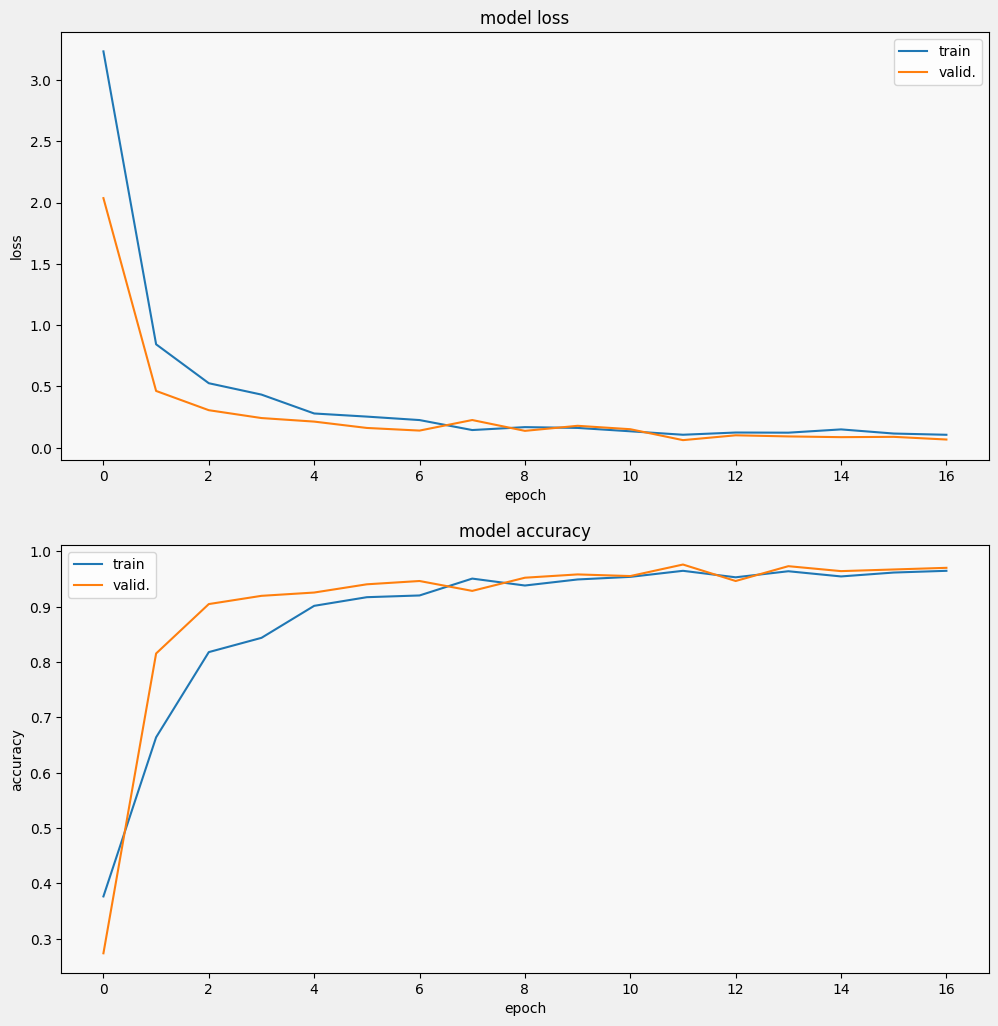

In [ ]:
#display
display_training_curves(
    history_inception.history['loss'],
    history_inception.history['val_loss'],
    'loss', 211)
display_training_curves(
    history_inception.history['accuracy'],
    history_inception.history['val_accuracy'],
    'accuracy', 212)

In [ ]:
# Predict the label of the test_images
import numpy as np
pred = inception.predict(test_generator)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

18/18 [==============================] - 2s 126ms/step
The first 5 predictions: ['KutuAir', 'KutuAir', 'CacarAir', 'CacarAir', 'Jerawat']


In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(test_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    CacarAir       0.97      1.00      0.98        61
   JamurKuku       1.00      0.96      0.98        52
     Jerawat       0.96      0.98      0.97        53
       Kurap       0.98      0.91      0.95        58
     KutuAir       0.93      0.98      0.95        54

    accuracy                           0.97       278
   macro avg       0.97      0.97      0.97       278
weighted avg       0.97      0.97      0.97       278



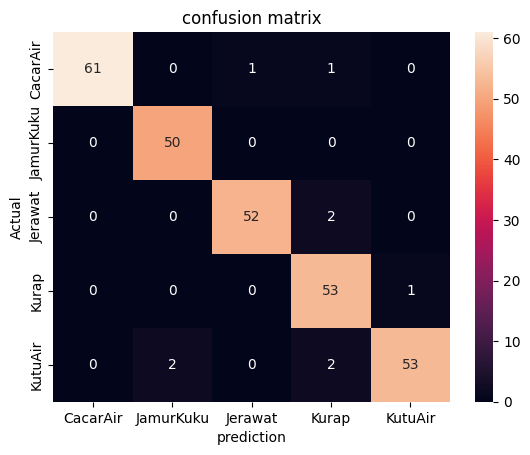

In [ ]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred,y_test)
df_cm = pd.DataFrame(cm, index = [i for i in range(5)],
                  columns = [i for i in range(5)])
# sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels.values(), yticklabels=labels.values())
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

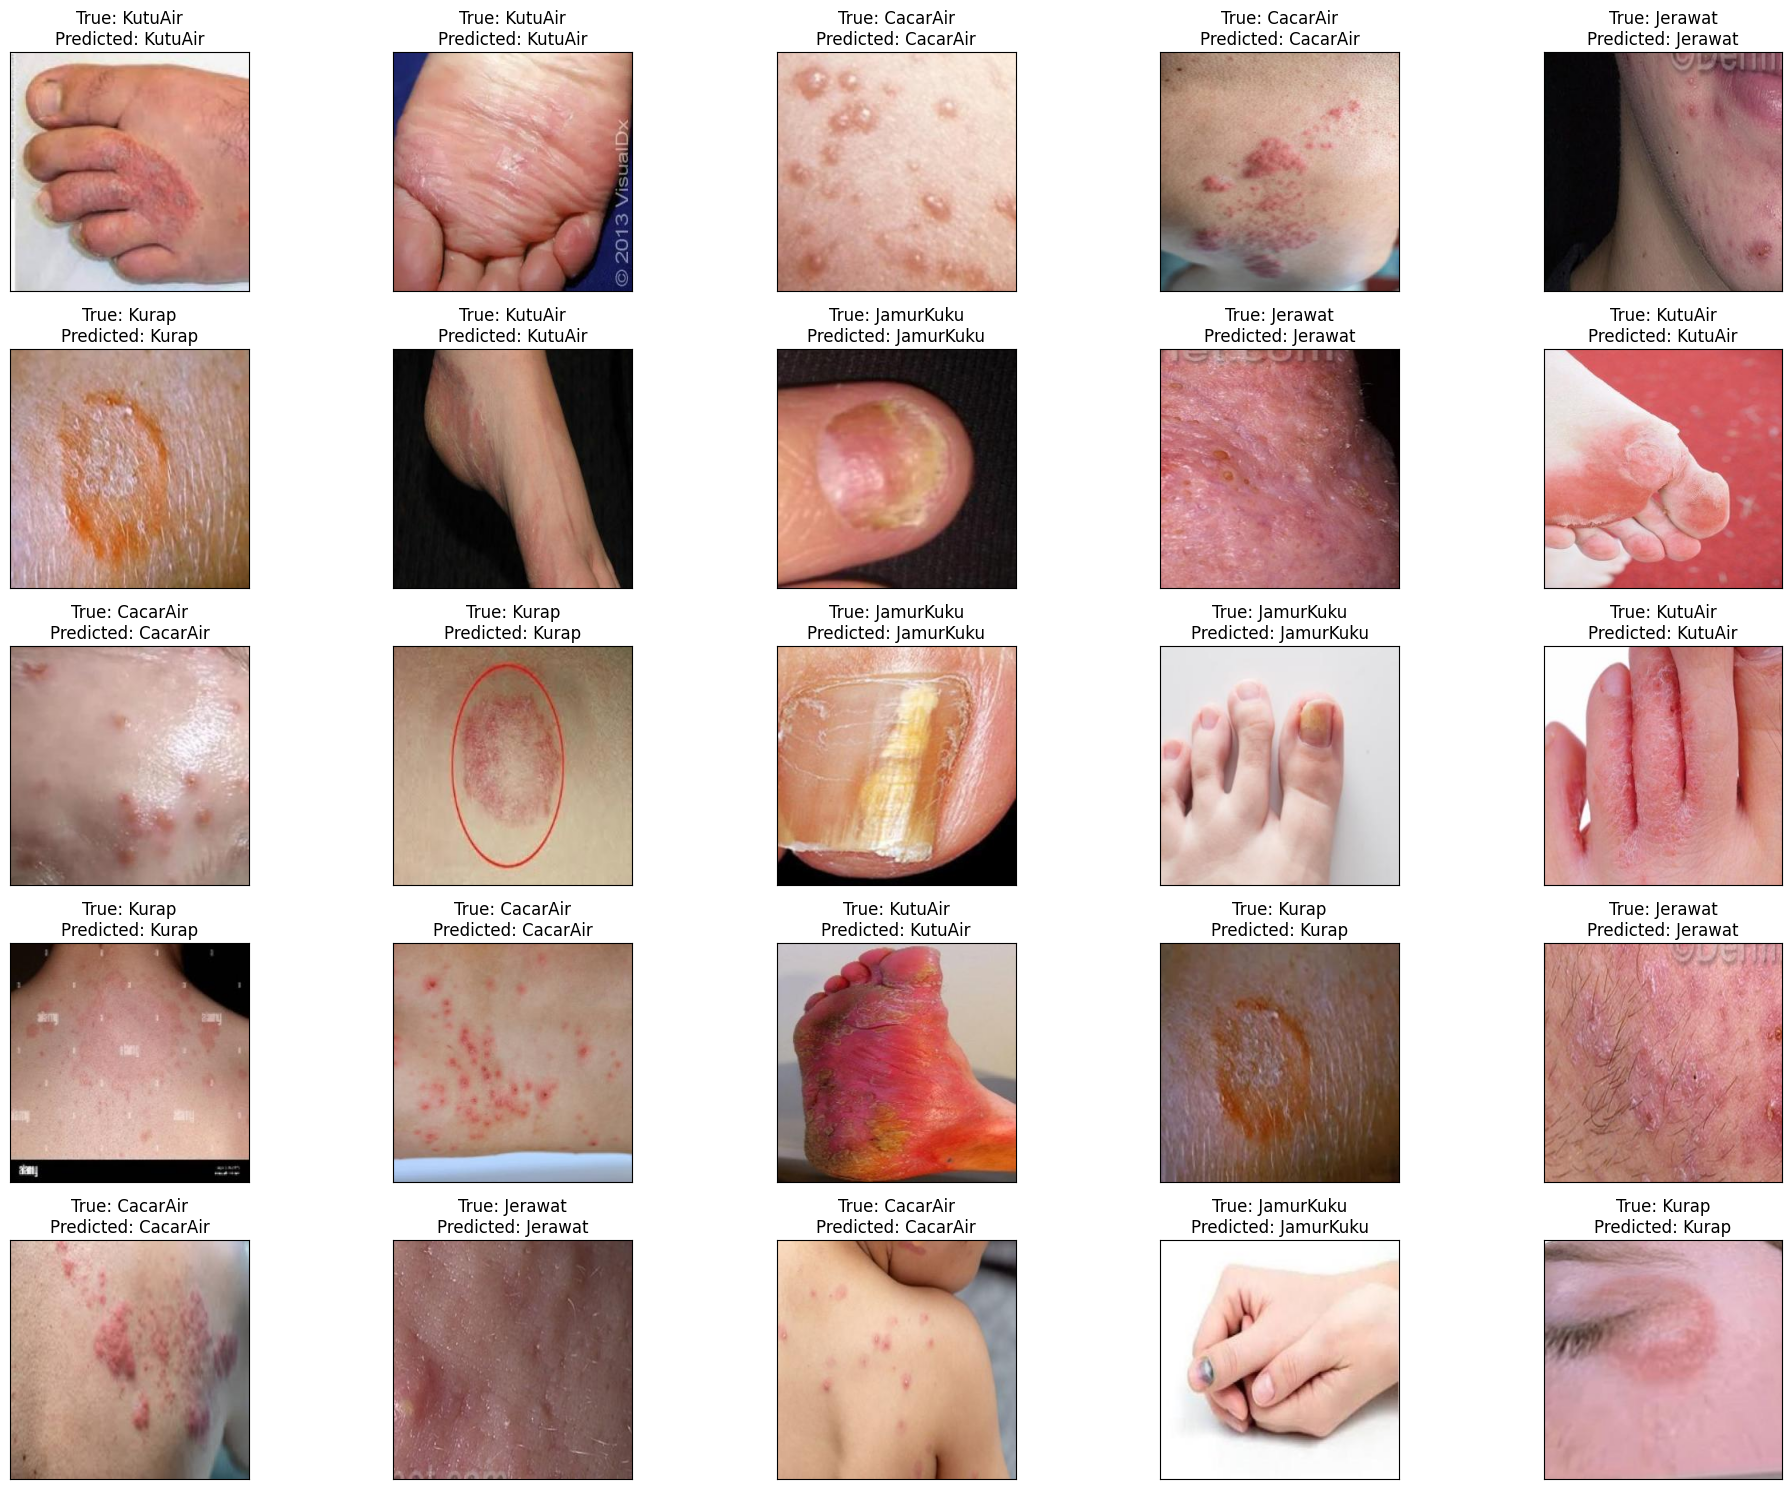

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

FileUpload(value={}, accept='image/*', description='Upload')

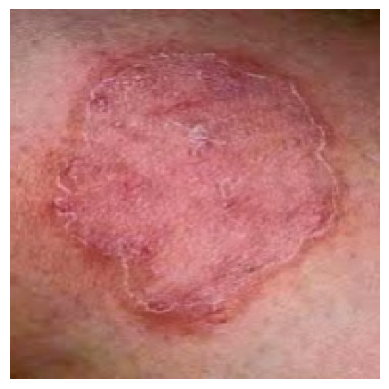

1/1 [==============================] - 1s 1s/step
Predicted Label for 7_FU-ringworm (16).jpg: Kurap


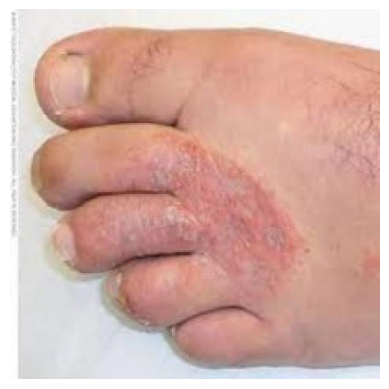

1/1 [==============================] - 0s 27ms/step
Predicted Label for 23-6-_jpeg.rf.514145721f7ba3a8693f1459eee6d369.jpg: Kutu Air


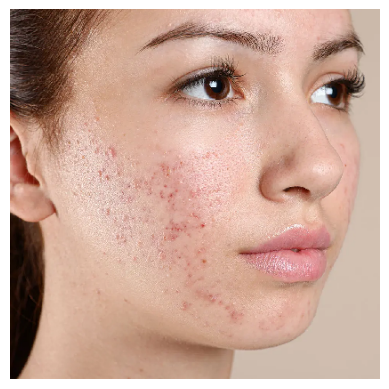

1/1 [==============================] - 0s 27ms/step
Predicted Label for acne.8.jpg: Jerawat


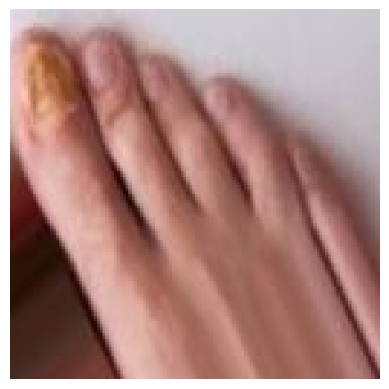

1/1 [==============================] - 0s 25ms/step
Predicted Label for _51_8623.jpg: Jamur Kuku


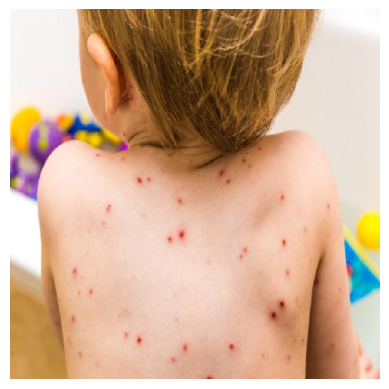

1/1 [==============================] - 0s 30ms/step
Predicted Label for 680b6854-a775-4d92-9327-776cd32e8fa5_43.jpg: Cacar Air


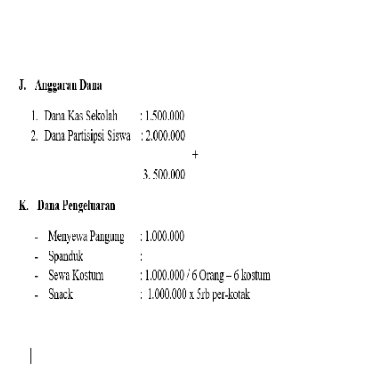

1/1 [==============================] - 0s 35ms/step
Predicted Label for Screenshot 2024-01-24 200020.png: Jamur Kuku


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display

# Define class labels
class_labels = ['Cacar Air', 'Jamur Kuku', 'Jerawat', 'Kurap', 'Kutu Air']

def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(416, 416))  # Adjusted size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)
    return img_array

def predict_image(image_path):
    img_array = load_and_preprocess_image(image_path)
    single_prediction = inception.predict(img_array)  # Use the correct model
    predicted_class = np.argmax(single_prediction, axis=1)
    predicted_label = class_labels[predicted_class[0]]
    return predicted_label

# File upload widget
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)

def on_file_upload_change(change):
    for filename, file_info in upload_widget.value.items():
        with open(filename, 'wb') as f:
            f.write(file_info['content'])
        # Display the uploaded image
        img = image.load_img(filename, target_size=(416, 416))  # Adjusted size
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        # Make a prediction
        predicted_label = predict_image(filename)
        print(f"Predicted Label for {filename}: {predicted_label}")

upload_widget.observe(on_file_upload_change, names='value')
display(upload_widget)


Verifying the file path and listing files in the directory...
ens_inceptionv.2.h5
Loading Model From /content/drive/MyDrive/inception/H5/inceptionv.3.h5...


Saving _9_8553.jpg to _9_8553.jpg
1/1 [==============================] - 2s 2s/step


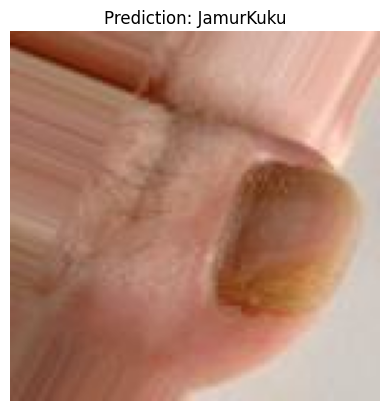

Prediction probabilities for each class:
CacarAir: 0.00%
JamurKuku: 99.98%
Jerawat: 0.00%
Kurap: 0.00%
KutuAir: 0.01%
Do you want to upload another image? (yes/no): yes


Saving acne.12.jpg to acne.12.jpg
1/1 [==============================] - 0s 233ms/step


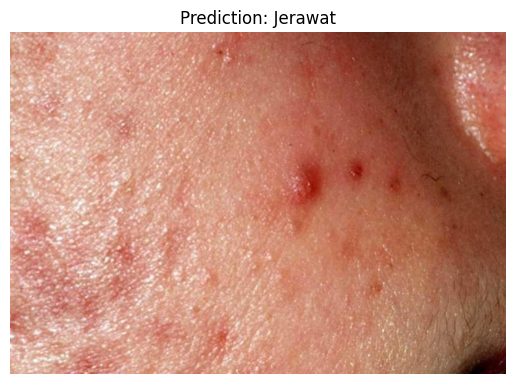

Prediction probabilities for each class:
CacarAir: 0.00%
JamurKuku: 0.00%
Jerawat: 100.00%
Kurap: 0.00%
KutuAir: 0.00%
Do you want to upload another image? (yes/no): yes


Saving 8_FU-ringworm (7).jpeg to 8_FU-ringworm (7).jpeg
1/1 [==============================] - 0s 252ms/step


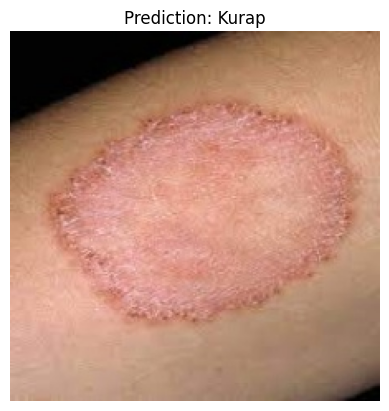

Prediction probabilities for each class:
CacarAir: 0.00%
JamurKuku: 0.00%
Jerawat: 0.00%
Kurap: 100.00%
KutuAir: 0.00%
Do you want to upload another image? (yes/no): yes


Saving 92841-ilustrasi-jamur-kuku-freepikcom.jpg to 92841-ilustrasi-jamur-kuku-freepikcom.jpg
1/1 [==============================] - 0s 219ms/step


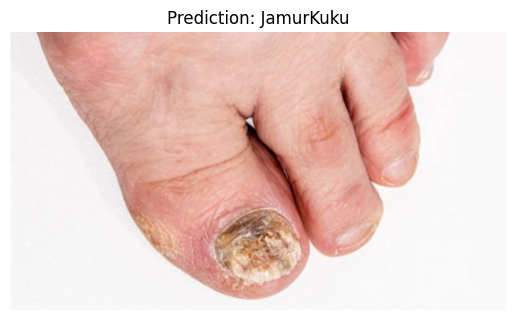

Prediction probabilities for each class:
CacarAir: 0.00%
JamurKuku: 100.00%
Jerawat: 0.00%
Kurap: 0.00%
KutuAir: 0.00%
Do you want to upload another image? (yes/no): yes


Saving 680b6854-a775-4d92-9327-776cd32e8fa5_43.jpg to 680b6854-a775-4d92-9327-776cd32e8fa5_43.jpg
1/1 [==============================] - 0s 222ms/step


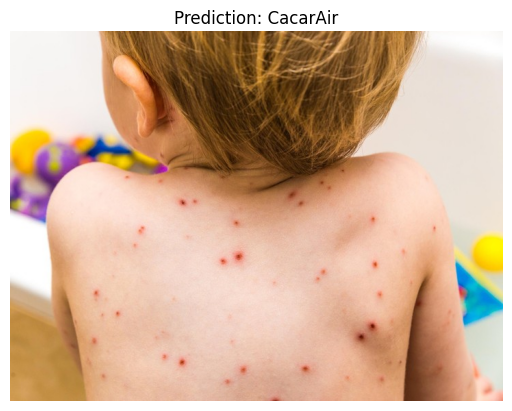

Prediction probabilities for each class:
CacarAir: 100.00%
JamurKuku: 0.00%
Jerawat: 0.00%
Kurap: 0.00%
KutuAir: 0.00%
Do you want to upload another image? (yes/no): yes


Saving 23-6-_jpeg.rf.514145721f7ba3a8693f1459eee6d369.jpg to 23-6-_jpeg.rf.514145721f7ba3a8693f1459eee6d369.jpg
1/1 [==============================] - 0s 244ms/step


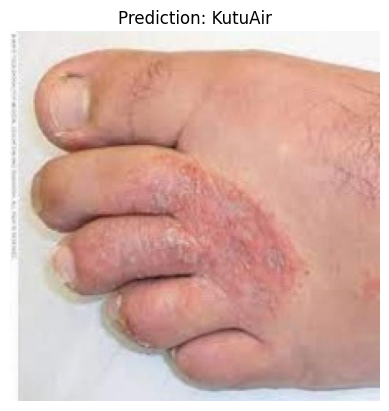

Prediction probabilities for each class:
CacarAir: 0.00%
JamurKuku: 0.00%
Jerawat: 0.00%
Kurap: 0.00%
KutuAir: 100.00%
Do you want to upload another image? (yes/no): yes


Saving Screenshot 2024-01-24 200020.png to Screenshot 2024-01-24 200020.png
1/1 [==============================] - 0s 211ms/step


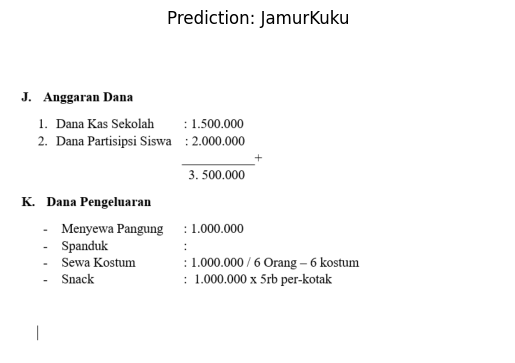

Prediction probabilities for each class:
CacarAir: 2.01%
JamurKuku: 42.42%
Jerawat: 31.00%
Kurap: 19.20%
KutuAir: 5.37%
Do you want to upload another image? (yes/no): yes


Saving Screenshot 2024-01-28 121400.png to Screenshot 2024-01-28 121400.png
1/1 [==============================] - 0s 240ms/step


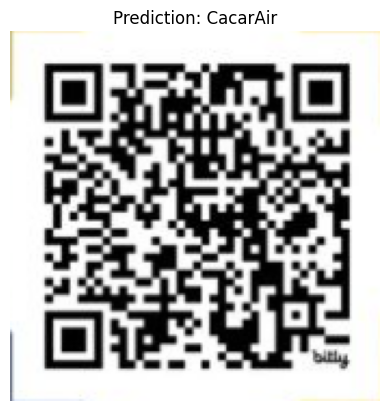

Prediction probabilities for each class:
CacarAir: 79.53%
JamurKuku: 1.34%
Jerawat: 1.23%
Kurap: 17.39%
KutuAir: 0.51%
Do you want to upload another image? (yes/no): no


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image


# Verify the file path and list files in the directory
MODEL_BASE_PATH = "/content/drive/MyDrive/inception/"
PROJECT_NAME = "H5"
SAVE_MODEL_NAME = "inceptionv.3.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

print('Verifying the file path and listing files in the directory...')
!ls /content/drive/MyDrive/ens2_inception/H5/

# Load the model
if os.path.exists(save_model_path):
    print('Loading Model From {}...'.format(save_model_path))
    model = load_model(save_model_path)
else:
    print('Model file not found. Please check the path and filename.')
    model = None

# Function to load and process image
def load_and_process_image(image_path, target_size=(416, 416)):
    img = load_img(image_path, target_size=target_size)  # Resize image
    img_array = img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image
    return img_array

# Make prediction if model is loaded
if model:
    while True:
        # Upload image
        uploaded = files.upload()
        for filename in uploaded.keys():
            image_path = filename

        # Process uploaded image
        img_array = load_and_process_image(image_path)

        # Make prediction
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)

        # Display prediction result
        class_labels = ['CacarAir', 'JamurKuku', 'Jerawat', 'Kurap', 'KutuAir']
        predicted_label = class_labels[predicted_class[0]]

        # Display image and prediction
        plt.imshow(Image.open(image_path))
        plt.title('Prediction: {}'.format(predicted_label))
        plt.axis('off')
        plt.show()

        # Display prediction probabilities
        print("Prediction probabilities for each class:")
        for i, label in enumerate(class_labels):
            print("{}: {:.2f}%".format(label, predictions[0][i] * 100))

        # Ask the user if they want to upload another image
        repeat = input("Do you want to upload another image? (yes/no): ").strip().lower()
        if repeat != 'yes':
            break
else:
    print('Cannot make predictions as the model is not loaded.')
